In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go

path_no2_clean = "/Users/gabrielerizzo/Programmazione/PROJECT AirQuality/df_no2_clean.csv"
df_no2_clean = pd.read_csv(path_no2_clean, sep=";")

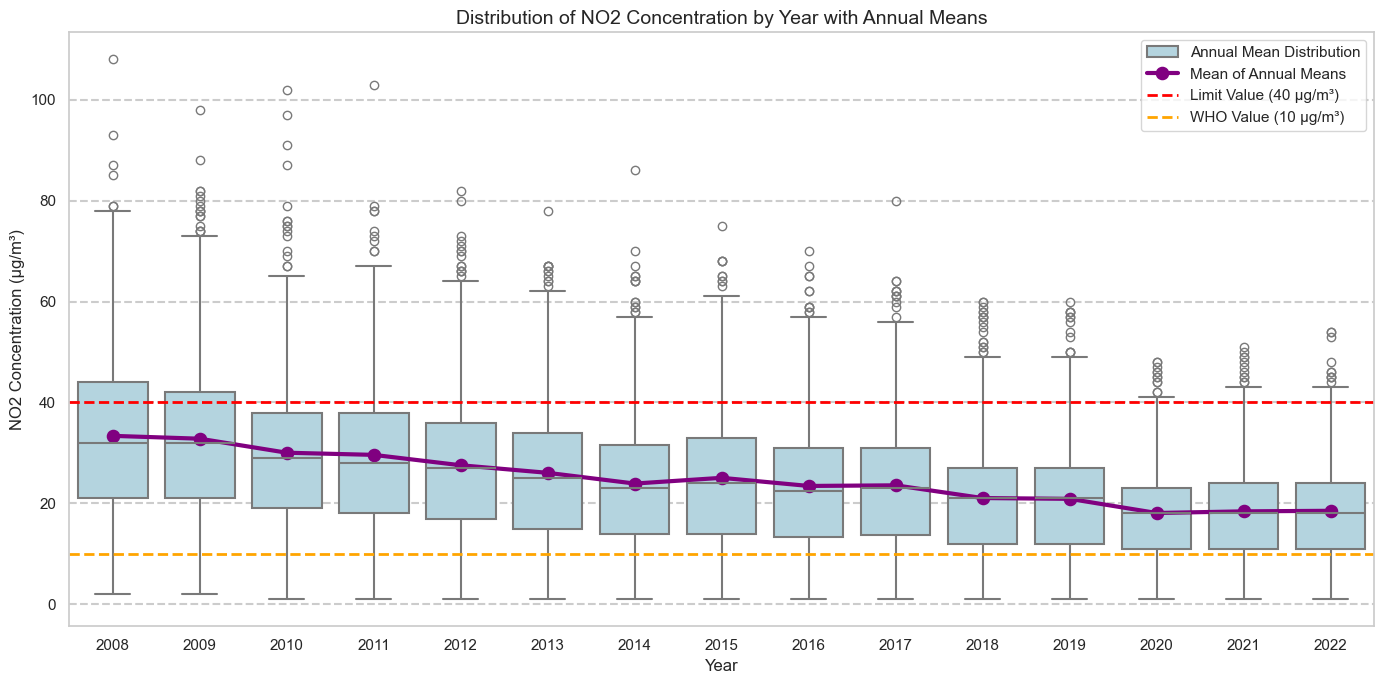

In [2]:
#  Calculating yearly means of NO2 concentration for the point plot
yearly_means = df_no2_clean.groupby('yy')['media_yy'].mean().reset_index()

# Creating a combined boxplot and pointplot for NO2 concentration by year
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Boxplot annual distribution of NO₂ concentrations
sns.boxplot(data=df_no2_clean, x='yy', y='media_yy', color='lightblue', 
            showfliers=True, linewidth=1.5, boxprops=dict(alpha=1), label='Annual Mean Distribution')

# Pointplot for annual means
sns.pointplot(data=yearly_means, x='yy', y='media_yy', color='purple', markers='o', 
              errorbar=None, linestyles='-', label='Mean of Annual Means', linewidth=3)

# Adding reference lines for limit and OMS thresholds
plt.axhline(40, color='red', linestyle='--', linewidth=2, label='Limit Value (40 µg/m³)')
plt.axhline(10, color='orange', linestyle='--', linewidth=2, label='WHO Value (10 µg/m³)')

# Adding labels, title and plot it
plt.xlabel('Year', fontsize=12)
plt.ylabel('NO2 Concentration (µg/m³)', fontsize=12)
plt.title('Distribution of NO2 Concentration by Year with Annual Means', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=1.5, alpha=1)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculating yearly means of NO2 concentration for the point plot
yearly_means = df_no2_clean.groupby('yy')['media_yy'].mean().reset_index()

# Create an interactive box plot with Plotly
fig = px.box(df_no2_clean, x='yy', y='media_yy', points="outliers", title="NO2 Concentration by Year with Annual Means")

# Add a line plot for annual means
fig.add_trace(go.Scatter(
    x=yearly_means['yy'],
    y=yearly_means['media_yy'],
    mode='lines+markers',
    name='Annual Mean',
    line=dict(color='purple', width=3),
    marker=dict(size=8)
))

# Adding reference lines for limit and OMS thresholds
fig.add_hline(y=40, line_dash="dash", line_color="red", annotation_text="Limit Value (40 µg/m³)")
fig.add_hline(y=10, line_dash="dash", line_color="orange", annotation_text="OMS Value (10 µg/m³)")

# Update layout with axis labels and legend
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="NO2 Concentration (µg/m³)",
    legend_title="Legend"
)

# Show the interactive plot
fig.show()


In [ ]:
# Serie temporale della media annuale (media_yy) per tutto il dataset
plt.figure(figsize=(12, 6))
sns.lineplot(x='yy', y='media_yy', data=df_no2_clean)
plt.title('Andamento temporale dei livelli di NO2 (media annuale)')
plt.xlabel('Anno')
plt.ylabel('Livelli di NO2 (media annuale)')
plt.show()

In [ ]:
# Media dei livelli di NO2 per regione
mean_no2_region = df_no2_clean.groupby('Regione')['media_yy'].mean().sort_values()

# Crea il grafico a barre orizzontali
plt.figure(figsize=(12, 8))
ax = mean_no2_region.plot(kind='barh', color='skyblue')

# Titolo e etichette degli assi
plt.title('Media dei livelli di NO2 per Regione (2008-2022)', fontsize=16)
plt.xlabel('Media di NO2', fontsize=12)
plt.ylabel('Regione', fontsize=12)
for index, value in enumerate(mean_no2_region):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

In [ ]:
tipo_colors = {
    'SF': 'blue',
    'ST': 'blue',
    'SI': 'blue',
    'UF': 'red',
    'UT': 'red',
    'UI': 'red',
    'RF': 'green',
    'RT': 'green',
    'RI': 'green',
}

tipo_order = ['SF', 'UF', 'RF', 'ST', 'UT', 'RT', 'SI', 'UI', 'RI']

# Imposta lo stile del grafico
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Crea il boxplot con "TIPO" assegnato sia a x che a hue, senza la legenda automatica
sns.boxplot(data=df_no2_clean, x='TIPO', y='media_yy', order= tipo_order, hue='TIPO', palette= tipo_colors, linewidth=1.5, fliersize=5)
plt.legend([], [], frameon=False)  # Disattiva la legenda automatica del boxplot

# Titoli e etichette
plt.title('Distribuzione dei Livelli di NO2 per Tipo di Zona/Stazione', fontsize=16, pad=15)
plt.xlabel('Tipo', fontsize=14, labelpad=10)
plt.ylabel('Media Annuale di NO2 (µg/m³)', fontsize=14, labelpad=10)

area_labels = {
    'blue': 'Suburbana',
    'red': 'Urbana',
    'green': 'Rurale',
}
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in area_labels.keys()]
plt.legend(custom_legend, area_labels.values(), title='Tipo di Area', fontsize=12, title_fontsize=13)

extra_legend_text = """
.F = Fondo
.T = Traffico
.I = Industriale
"""
plt.text(1.02, 0.5, extra_legend_text, fontsize=12, transform=plt.gca().transAxes, verticalalignment='center')


# Mostra il grafico
plt.tight_layout()
plt.show()



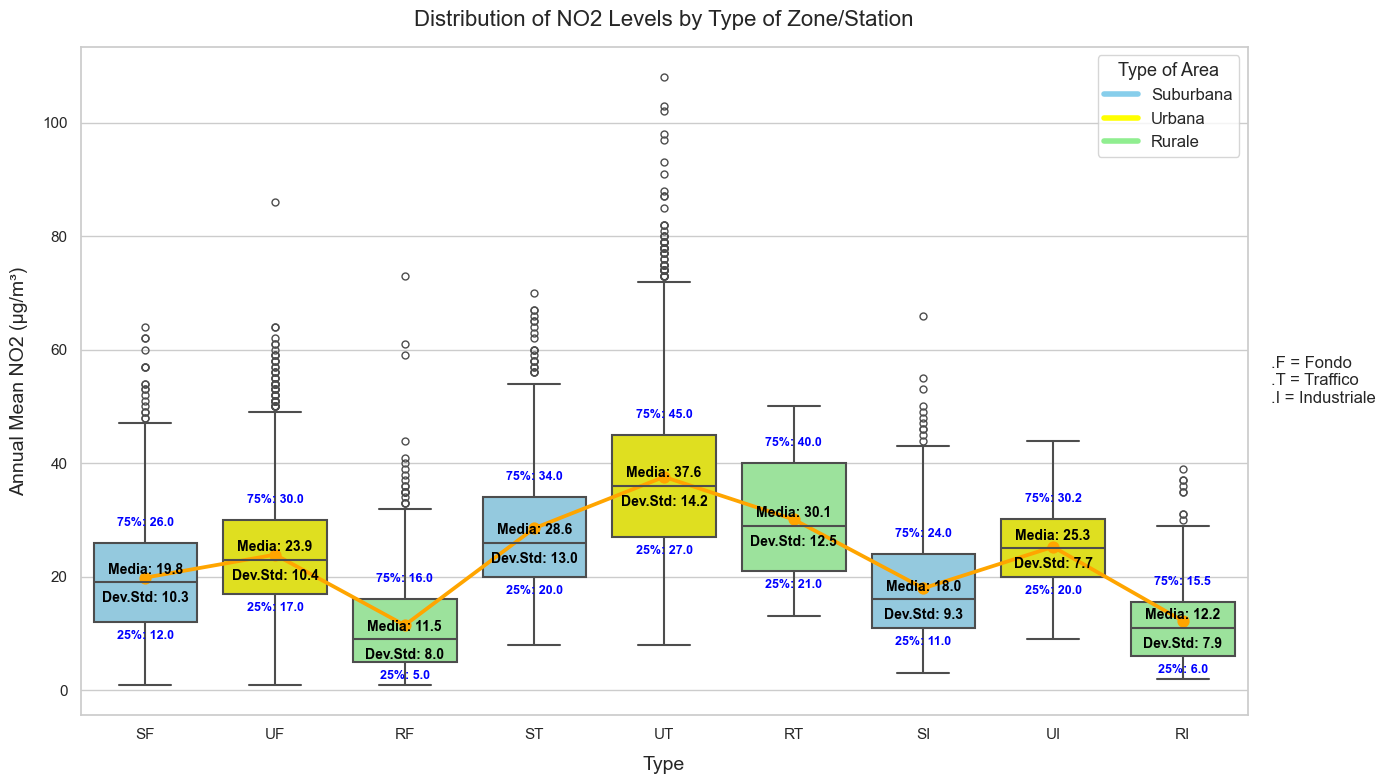

In [3]:
tipo_colors = {
    'SF': 'skyblue',
    'ST': 'skyblue',
    'SI': 'skyblue',
    'UF': 'yellow',
    'UT': 'yellow',
    'UI': 'yellow',
    'RF': 'lightgreen',
    'RT': 'lightgreen',
    'RI': 'lightgreen',
}

tipo_order = ['SF', 'UF', 'RF', 'ST', 'UT', 'RT', 'SI', 'UI', 'RI']

# Calcola la media delle medie annuali per ogni tipo di stazione
mean_of_means = df_no2_clean.groupby('TIPO')['media_yy'].mean().reset_index()

# Calcola le statistiche numeriche per ogni tipo, inclusi i percentili
statistiche = df_no2_clean.groupby('TIPO')['media_yy'].agg(
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    perc25=lambda x: x.quantile(0.25),
    perc75=lambda x: x.quantile(0.75)
).reset_index()

# Imposta lo stile del grafico
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Crea il boxplot con l'ordine personalizzato per i tipi
sns.boxplot(data=df_no2_clean, x='TIPO', y='media_yy', order=tipo_order, hue='TIPO', palette=tipo_colors, linewidth=1.5, fliersize=5)

sns.pointplot(
    data=mean_of_means,
    x='TIPO',
    y='media_yy',
    order=tipo_order,
    color='orange',
    markers='o',
    linestyles='-',
    label='Mean of Annual Means'
)

# Titoli e etichette
plt.title('Distribution of NO2 Levels by Type of Zone/Station', fontsize=16, pad=15)
plt.xlabel('Type', fontsize=14, labelpad=10)
plt.ylabel('Annual Mean NO2 (µg/m³)', fontsize=14, labelpad=10)

# Aggiungi le statistiche numeriche sul grafico
for index, row in statistiche.iterrows():
    tipo = row['TIPO']
    mean = row['mean']
    median = row['median']
    std = row['std']
    perc25 = row['perc25']
    perc75 = row['perc75']
    
    # Trova la posizione sull'asse x per ogni tipo
    x_pos = tipo_order.index(tipo)
    
    # Aggiungi le annotazioni di media e deviazione standard sopra ogni boxplot
    plt.text(x_pos, median + 1.5, f"Media: {mean:.1f}", color='black', ha='center', fontsize=10, fontweight='bold')
    plt.text(x_pos, median - 3.5, f"Dev.Std: {std:.1f}", color='black', ha='center', fontsize=10, fontweight='bold')

    # Aggiungi annotazioni per i percentili
    plt.text(x_pos, perc25 - 3, f"25%: {perc25:.1f}", color='blue', ha='center', fontsize=9, fontweight='bold')
    plt.text(x_pos, perc75 + 3, f"75%: {perc75:.1f}", color='blue', ha='center', fontsize=9, fontweight='bold')

# Aggiungi la legenda personalizzata per le aree
area_labels = {
    'skyblue': 'Suburbana',
    'yellow': 'Urbana',
    'lightgreen': 'Rurale'
}
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in area_labels.keys()]
plt.legend(custom_legend, area_labels.values(), title='Type of Area', fontsize=12, title_fontsize=13)

# Aggiungi ulteriore legenda esplicativa per Fondo, Traffico, Industriale
extra_legend_text = """
.F = Fondo
.T = Traffico
.I = Industriale
"""
plt.text(1.02, 0.5, extra_legend_text, fontsize=12, transform=plt.gca().transAxes, verticalalignment='center')

# Mostra il grafico
plt.tight_layout()
plt.show()


In [ ]:
# Creazione della mappa di calore con i dati geografici (Lon e Lat)
mapa = folium.Map(location=[41.9028, 12.4964], zoom_start=6)  # Centra la mappa sull'Italia

# Filtra i dati per punti validi e crea una lista di coordinate e livelli NO2
heat_data = [[row['Lat'], row['Lon'], row['media_yy']] for index, row in df_no2_clean.iterrows() if not pd.isna(row['Lat']) and not pd.isna(row['Lon'])]

# Aggiunge il layer di mappa di calore
HeatMap(heat_data, radius=10).add_to(mapa)
mapa

# Mappa di calore con Folium per la media annuale di NO₂
#m = folium.Map(location=[41.8719, 12.5674], zoom_start=6)
#heat_data = [[row['Lat'], row['Lon'], row['media_yy']] for index, row in df_no2.iterrows()]
#HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Salva la mappa di calore come HTML
#m.save("heatmap_NO2_folium.html")

In [ ]:
# Assicurati che la colonna 'yy' sia di tipo stringa
df_no2_clean['yy'] = df_no2_clean['yy'].astype(str)

# Ordina il DataFrame per 'yy' in ordine crescente
df_no2_clean = df_no2_clean.sort_values(by='yy')

# Funzione per definire i colori e le etichette per la legenda
def define_color_label(concentration):
    if concentration > 40:
        return 'red', '(40;+]'
    elif 30 < concentration <= 40:
        return 'orange', '(30;40]'
    elif 20 < concentration <= 30:
        return 'yellow', '(20;30]'
    elif 10 < concentration <= 20:
        return 'green', '(10;20]'
    else:
        return 'skyblue', '(0;10]'

# Applica la funzione per ottenere i colori e le etichette corrette per la legenda
df_no2_clean[['color', 'color_label']] = df_no2_clean['media_yy'].apply(lambda x: pd.Series(define_color_label(x)))

# Definisci l'ordine dei colori per la legenda
color_order = ['(0;10]', '(10;20]', '(20;30]', '(30;40]', '(40;+]']
color_discrete_map = {
    '(0;10]': 'skyblue',
    '(10;20]': 'green',
    '(20;30]': 'yellow',
    '(30;40]': 'orange',
    '(40;+]': 'red'
}

# Ottieni la lista degli anni unici, ordinati
years = sorted(df_no2_clean['yy'].unique())

# Imposta l'anno iniziale
initial_year = '2022'
df_initial = df_no2_clean[df_no2_clean['yy'] == initial_year]

# Crea la figura base
fig = go.Figure()

# Aggiungi tracce separate per ogni color_label (Dati) con showlegend=True
for label in color_order:
    df_label = df_initial[df_initial['color_label'] == label]
    fig.add_trace(
        go.Scattermapbox(
            lat=df_label['Lat'],
            lon=df_label['Lon'],
            mode='markers',
            marker=dict(
                size=10,
                color=color_discrete_map[label],
                opacity=1
            ),
            text=df_label.apply(
                lambda row: f"Concentrazione NO₂: {row['media_yy']} μg/m³<br>"
                            f"Anno: {row['yy']}<br>"
                            f"Comune: {row['Comune']}<br>"
                            f"Nome stazione: {row['nome_stazione']}", axis=1
            ),
            hoverinfo='text',
            name=label,
            showlegend=True
        )
    )

# Crea i frame per ogni anno aggiornando le tracce esistenti
frames = [go.Frame(data=fig.data, name='initial')]
for year in years:
    frame_data = [
        go.Scattermapbox(
            lat=df_no2_clean[(df_no2_clean['yy'] == year) & (df_no2_clean['color_label'] == label)]['Lat'],
            lon=df_no2_clean[(df_no2_clean['yy'] == year) & (df_no2_clean['color_label'] == label)]['Lon'],
            mode='markers',
            marker=dict(
                size=10,
                color=color_discrete_map[label],
                opacity=1
            ),
            text=df_no2_clean[(df_no2_clean['yy'] == year) & (df_no2_clean['color_label'] == label)].apply(
                lambda row: f"Concentrazione NO₂: {row['media_yy']} μg/m³<br>"
                            f"Anno: {row['yy']}<br>"
                            f"Comune: {row['Comune']}<br>"
                            f"Nome stazione: {row['nome_stazione']}", axis=1
            ),
            hoverinfo='text',
            name=label,
            showlegend=True
        ) for label in color_order
    ]
    frames.append(go.Frame(data=frame_data, name=year))

fig.frames = frames

# Definisci i passi dello slider
slider_steps = [
    dict(
        method="animate",
        args=[
            [year],
            dict(
                mode="immediate",
                frame=dict(duration=300, redraw=True),
                transition=dict(duration=0)
            )
        ],
        label=year
    ) for year in years
]

# Aggiungi lo slider e i pulsanti di animazione
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=41.8719, lon=12.5674),
        zoom=5
    ),
    margin={"r": 0, "t": 30, "l": 0, "b": 100},
    title="Mappa delle concentrazioni medie annuali NO₂ in Italia",
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            y=0,
            x=0,
            xanchor="left",
            yanchor="bottom",
            pad=dict(t=10, l=10),
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[
                        None,
                        dict(
                            frame=dict(duration=500, redraw=True),
                            transition=dict(duration=0),
                            fromcurrent=True,
                            mode='immediate'
                        )
                    ]
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[
                        [None],
                        dict(
                            frame=dict(duration=0, redraw=False),
                            transition=dict(duration=0),
                            mode='immediate'
                        )
                    ]
                )
            ]
        )
    ],
    sliders=[
        dict(
            active=years.index(initial_year),
            currentvalue={"prefix": "Anno: "},
            pad={"t": 10},
            steps=slider_steps,
            len=0.9,
            x=0.05,
            y=0,
            xanchor='left'
        )
    ],
    legend=dict(
        title="Intervalli di concentrazione NO₂ (μg/m³)",
        itemsizing='constant'
    )
)

# Gestione dell'opacità dei pallini
fig.update_traces(
    selected=dict(
        marker=dict(
            opacity=1,
            size=12
        )
    ),
    unselected=dict(
        marker=dict(
            opacity=0.3
        )
    )
)

# Mostra la figura
fig.show()

# Salva la figura come HTML senza auto-play
# fig.write_html("mappa_stazioni_NO2_DEFINITIVA.html", auto_play=False)


In [ ]:
# Mappa di calore delle concentrazioni medie di NO2 per anno e regione
heatmap_data = df_no2_clean.groupby(['yy', 'Regione']).agg({'media_yy': 'mean'}).reset_index()

# Crea la mappa di calore
fig = px.density_heatmap(
    heatmap_data,
    x='yy',
    y='Regione',
    z='media_yy',
    color_continuous_scale='Viridis',
    title='Mappa di Calore delle Concentrazioni Medie Annuali di NO₂ per Regione',
    labels={'yy': 'Anno', 'Regione': 'Regione', 'media_yy': 'Media NO₂ (µg/m³)'}
)

# Mostra la figura
fig.show()

# Mappa di scatter geografica con concentrazione media
fig_scatter = px.scatter_geo(
    df_no2_clean,
    lat='Lat',
    lon='Lon',
    color='media_yy',
    hover_name='nome_stazione',
    size='media_yy',
    animation_frame='yy',
    projection='natural earth',
    color_continuous_scale='Jet',
    title='Concentrazione Media Annuale di NO₂ in Italia (Animazione per Anno)',
    labels={'media_yy': 'Media NO₂ (µg/m³)', 'yy': 'Anno'}
)

# Centra la mappa scatter sull'Italia
fig_scatter.update_geos(
    center={'lat': 41.8719, 'lon': 12.5674},
    projection_scale=15  # Imposta il livello di zoom
)

# Mostra la figura scatter geografica
fig_scatter.show()

# Salva le figure come HTML
# fig.write_html("heatmap_NO2.html")
# fig_scatter.write_html("scatter_NO2.html")


In [ ]:
# Grafico a torta per il tipo di stazione (traffico, industriale, background, ecc.)
pie_data = df_no2_clean['TIPO'].value_counts().reset_index()
pie_data.columns = ['Tipo Stazione', 'Count']
fig_pie = px.pie(
    pie_data,
    names='Tipo Stazione',
    values='Count',
    title='Distribuzione delle Tipologie di Stazione di Monitoraggio NO₂'
)
fig_pie.show()

# Salva le figure come HTML
#fig_bar.write_html("sup_bar.html")
#fig_pie.write_html("type_pie.html")


In [4]:
# Calcola la concentrazione media per ogni stazione
df_avg = df_no2_clean.groupby(['Lat', 'Lon', 'Comune', 'nome_stazione']).agg(
    media_concentrazione=('media_yy', 'mean')
).reset_index()

# Funzione per definire colori in base alla concentrazione media
def define_color(concentration):
    if concentration > 40:
        return 'red', '(40;+]'
    elif 30 < concentration <= 40:
        return 'orange', '(30;40]'
    elif 20 < concentration <= 30:
        return 'yellow', '(20;30]'
    elif 10 < concentration <= 20:
        return 'green', '(10;20]'
    elif 0 < concentration <= 10:
        return 'skyblue', '(0;10]'
    else:
        return "gray"

# Aggiunge colonne per i colori e le etichette della leggenda
df_avg[['color', 'color_label']] = df_avg['media_concentrazione'].apply(lambda x: pd.Series(define_color(x)))

# Ordine dei range per la leggenda
color_order = ['(0;10]', '(10;20]', '(20;30]', '(30;40]', '(40;+]']
color_discrete_map = {
    '(0;10]': 'skyblue',
    '(10;20]': 'green',
    '(20;30]': 'yellow',
    '(30;40]': 'orange',
    '(40;+]': 'red'
}

# Crea la figura
fig = go.Figure()

# Aggiungi i marker per ogni intervallo di colore
for label in color_order:
    df_label = df_avg[df_avg['color_label'] == label]
    fig.add_trace(
        go.Scattermapbox(
            lat=df_label['Lat'],
            lon=df_label['Lon'],
            mode='markers',
            marker=dict(
                size=10,
                color=color_discrete_map[label],
                opacity=1
            ),
            text=df_label.apply(
                lambda row: f"Stazione: {row['nome_stazione']}<br>"
                            f"Comune: {row['Comune']}<br>"
                            f"Concentrazione media NO₂ (2008-2022): {row['media_concentrazione']:.2f} μg/m³", axis=1
            ),
            hoverinfo='text',
            name=label  # Usa l'etichetta come nome per la leggenda
        )
    )

# Imposta il layout della mappa
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=41.8719, lon=12.5674),  # Coordinate centrali per l'Italia
        zoom=5
    ),
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
    title="Map of annual average NO₂ concentrations (2008-2022)",
    legend=dict(
        title="Ranges of concentration NO₂ (μg/m³)",
        itemsizing="constant"
    )
)

# Mostra la figura
fig.show()

#fig.write_html("mappa_NO2_Italia.html", auto_open=False)
